# ML-QuIC Demonstration Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [1]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [2]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/BigAnalysis'
RANDOM_SEED = 7

# Load dataAC
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics()

Loading Data from ./Data/BigAnalysis
---- Dataset Label Distribution ----
Negative Samples: 6782
False Positive Samples: 242
Positive Samples: 1004

---- Well Content Distribution: ----
Data Wells: 7044
Control Wells: 984


[6782, 242, 1004, 984, 7044]

## Unsupervised
### KMeans

In [3]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


### Spectral Clustering

In [4]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Metrics', data_type='analysis', tag='Unsupervised')

## Supervised Models

### SVM

In [5]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='./SavedModels/Analysis/', random_state = 30, model_name='svm'), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [6]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

\MLP Model Loaded:
<class 'keras.src.engine.functional.Functional'>


## Training and Evaluation

### Training

In [7]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

[1636 6145 7655 1819 5028 2040  635  736 2915 2313 3835 6352 4527 5065
 4635 7013  212 6537  238 1378 5386 5312 7343 3252  319 3147 2678 2244
 2972 2619 6390 7256 7118 2695 2037  987  443 3354 7286 6157 3375  339
  795 2487 6355 6976 2644 4318 3383  474 3898 1390 5905 2441 2027 7317
 5776  143 5937 1538 5475 2286 7799 7034 4872 5706 6365 7588 5781 3612
 4176  179  698 4667 7859 2586 7386 7697 4072 2554 3426 7719 3466 3609
 6829 6411 6682 5691 4171 6945 5601  135 2051 1407 2778 1025 7750 2124
 5647 5058  445 4903 7968 1164  207  662 4367 2084 5779 7328 2251 2721
 7133 2082 5245  964  129 3093 7271 2148 7834 7884 8002  340 4588 4932
 1237 7478 2091 5800 7757 1981    8 3178 1536 6231 5602  366 7318 4591
  303 3243 2275 4214 1706  444 7955 5670 6044  233 5360 3047  389 4628
 3097 2311 3130 1656 3992   78 3619 1055 1512 5850 3990 5152 7078 6791
 6841 1502 1307 7102 4753 5560 2888 2485 6524 4162 1185 5285 2102 1566
 7032 7458  608 5464 6640 5662 4942 5053 2033  773 6881 1991 5805 1118
 5396 

FileNotFoundError: [Errno 2] No such file or directory: './SavedModels/Raw/svm.pkl'

### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7024
         pos       0.92      0.43      0.59      1004

    accuracy                           0.92      8028
   macro avg       0.92      0.71      0.77      8028
weighted avg       0.92      0.92      0.91      8028

KMeans Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98      7024
         pos       0.81      1.00      0.89      1004

    accuracy                           0.97      8028
   macro avg       0.90      0.98      0.94      8028
weighted avg       0.98      0.97      0.97      8028



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Raw:
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95      7024
         pos       0.61      0.97      0.75      1004

    accuracy                           0.92      8028
   macro avg       0.80      0.94      0.85      8028
weighted avg       0.95      0.92      0.93      8028



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.23      0.37      7024
         pos       0.16      1.00      0.27      1004

    accuracy                           0.32      8028
   macro avg       0.58      0.61      0.32      8028
weighted avg       0.89      0.32      0.36      8028

-------- Results on False Positives for KMeans Raw --------
Accuracy on False Positives: 0.8471074380165289
False Positives Account for 6.09% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 26.43243243243243
Average RAF: 0.0384141394864865
Average MPR: 13.497430543513513
Average MS: 1063.2567567567567
Correctly Classified FP Characteristics:
Average Time to Threshold: 37.32473170731707
Average RAF: 0.03164910929268293
Average MPR: 7.103047725956097
Average MS: 540.8256097560976


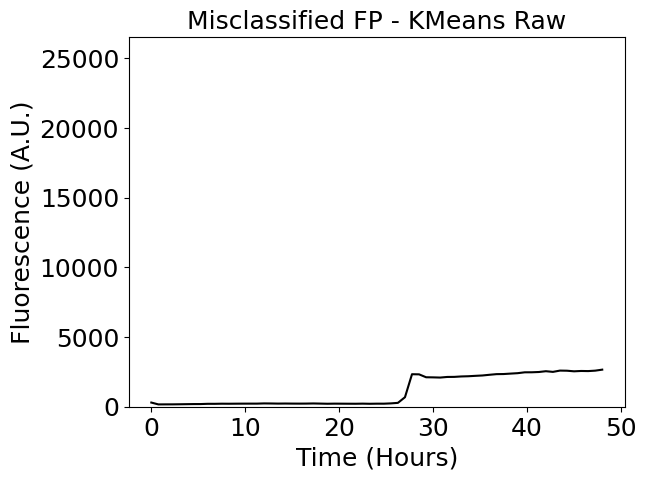

-------- Results on False Positives for KMeans Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 100.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 35.65938016528926
Average RAF: 0.032683432090909084
Average MPR: 8.080701297235537
Average MS: 620.7014462809917
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


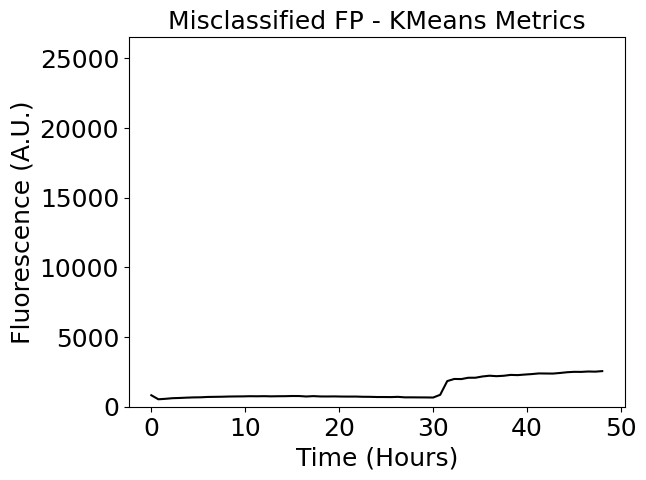

-------- Results on False Positives for Spectral Raw --------
Accuracy on False Positives: 0.23140495867768596
False Positives Account for 28.10% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.431827956989245
Average RAF: 0.03474035737096774
Average MPR: 9.268021261155914
Average MS: 725.266129032258
Correctly Classified FP Characteristics:
Average Time to Threshold: 43.058035714285715
Average RAF: 0.025851501696428573
Average MPR: 4.137102845642857
Average MS: 273.39732142857144


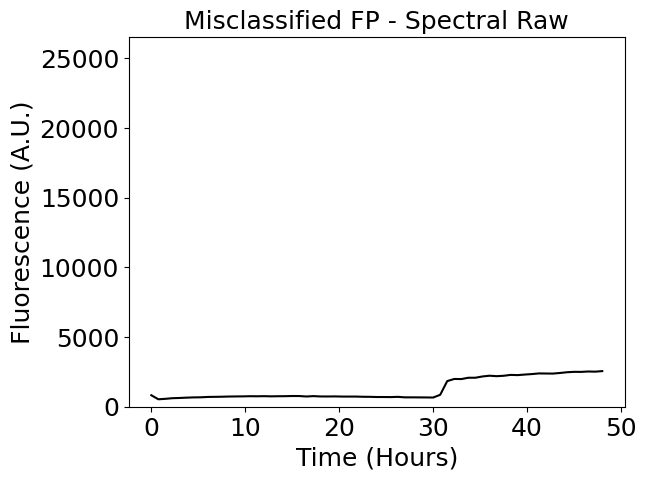

-------- Results on False Positives for Spectral Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 4.46% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 35.65938016528926
Average RAF: 0.032683432090909084
Average MPR: 8.080701297235537
Average MS: 620.7014462809917
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


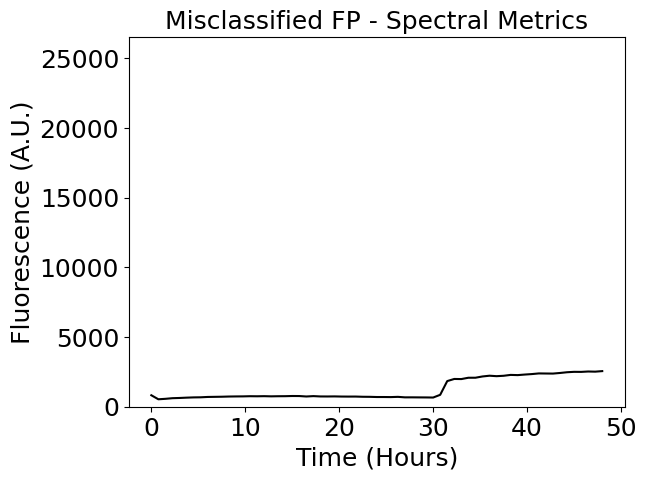

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75


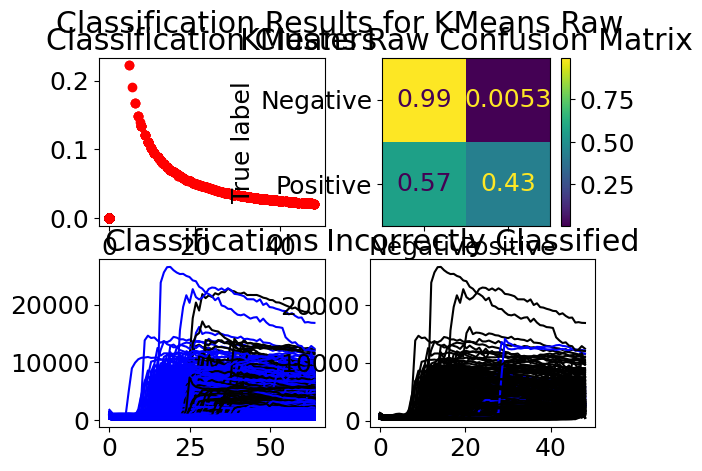

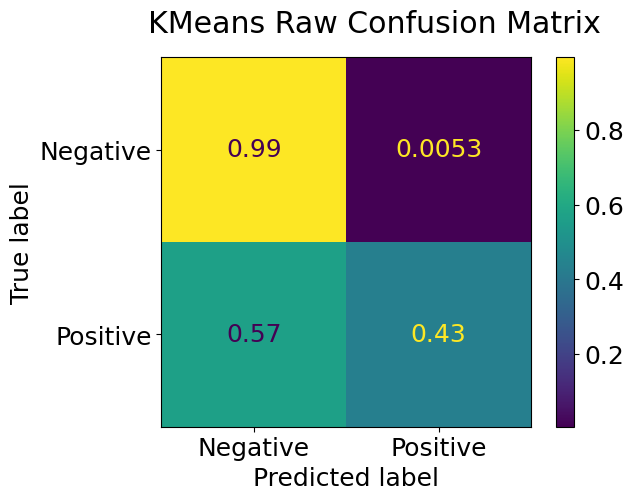

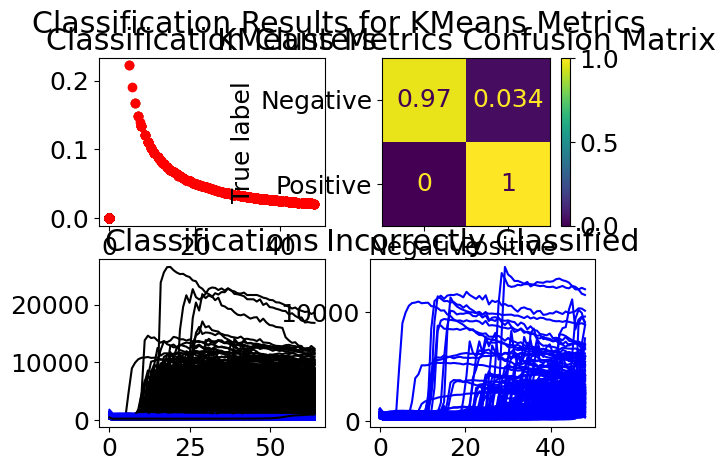

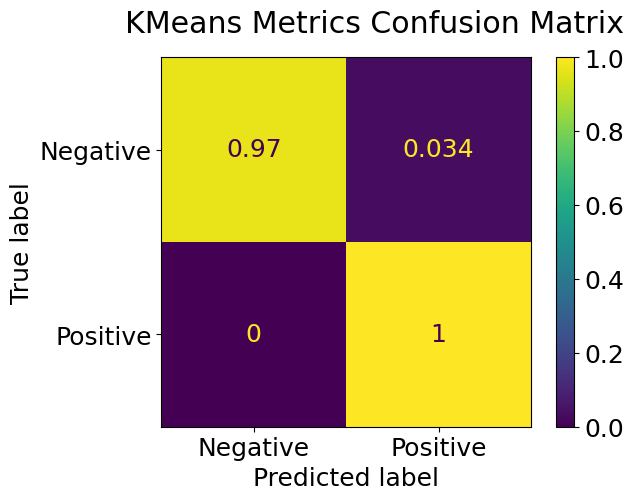

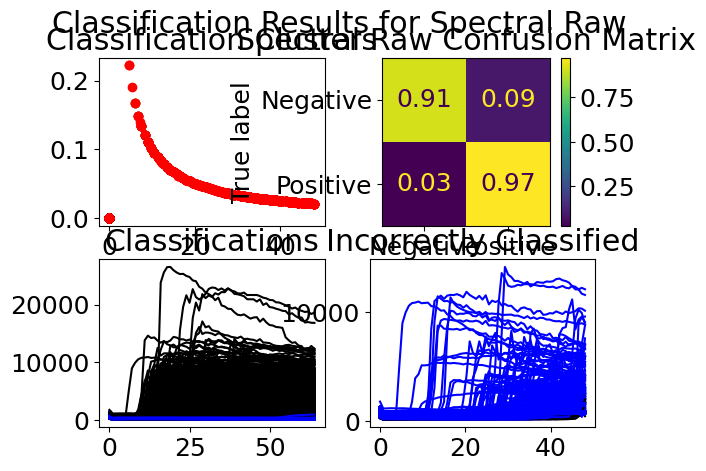

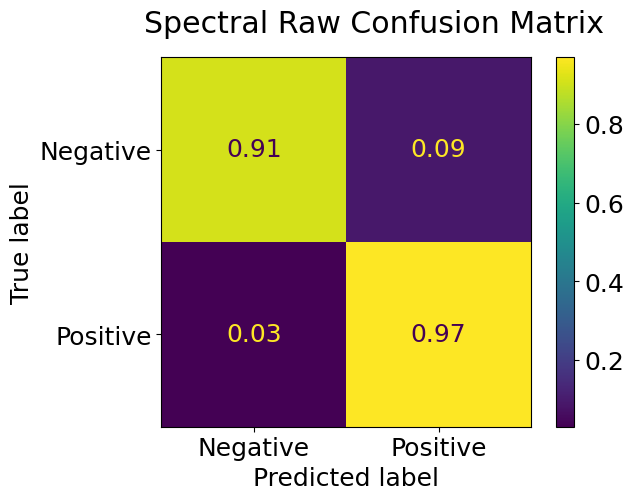

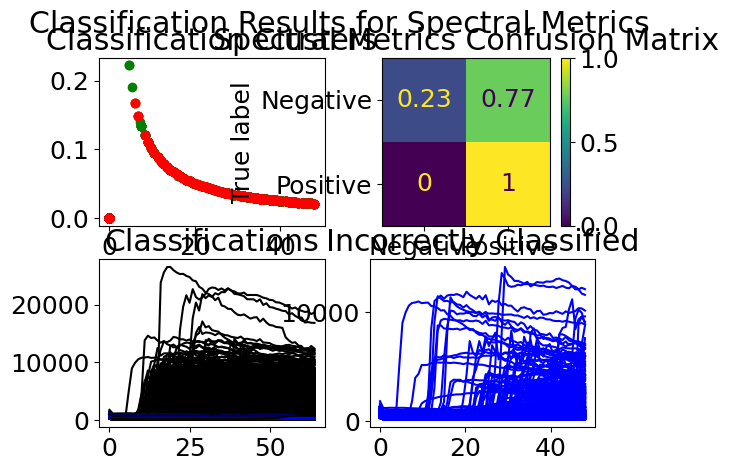

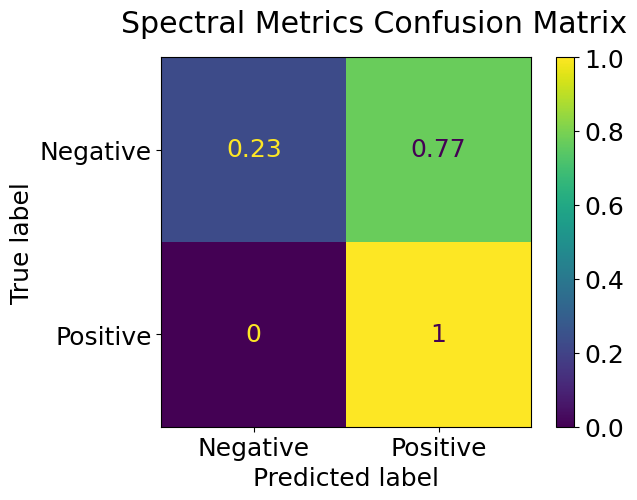

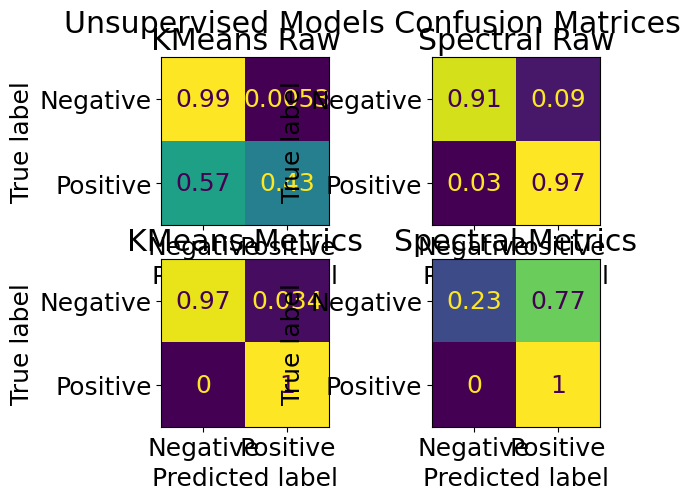

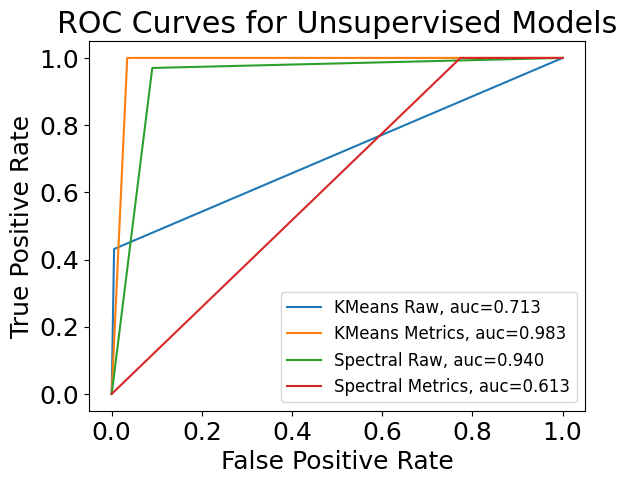

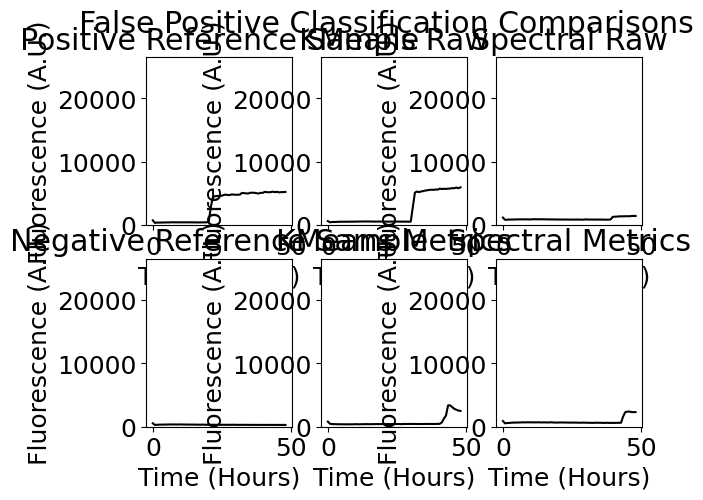

In [41]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])
ml_quic.get_group_plots_unsupervised(tags = ['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.98      0.99      0.99       704
         pos       0.90      0.89      0.89        98

    accuracy                           0.97       802
   macro avg       0.94      0.94      0.94       802
weighted avg       0.97      0.97      0.97       802

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       704
         pos       0.84      0.92      0.88        98

    accuracy                           0.97       802
   macro avg       0.91      0.95      0.93       802
weighted avg       0.97      0.97      0.97       802

26/26 [==============================] - 0s 1ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99       704
         pos       0.88      0.95      0.91        98

    accuracy                           0.98       802
   macro avg       0.94      0.97      0.95 

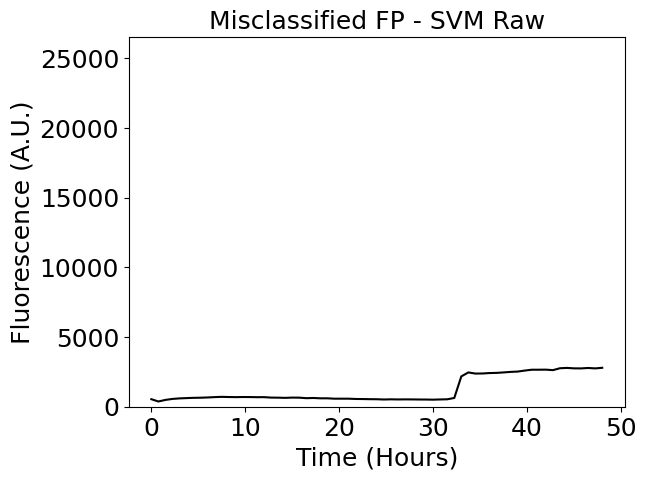

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.43333333333333335
False Positives Account for 68.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.3235294117647
Average RAF: 0.03491307135294118
Average MPR: 7.57519253717647
Average MS: 587.8823529411765
Correctly Classified FP Characteristics:
Average Time to Threshold: 38.94230769230769
Average RAF: 0.03981687846153846
Average MPR: 6.904284285076925
Average MS: 578.7307692307693


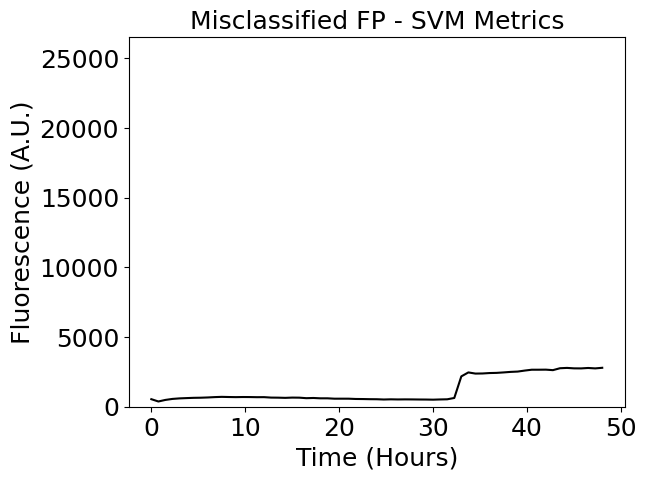

-------- Results on False Positives for MLP Raw --------
26/26 [==============================] - 0s 1ms/step
Accuracy on False Positives: 0.5666666666666667
False Positives Account for 72.22% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 32.42307692307692
Average RAF: 0.03648215976923077
Average MPR: 6.909478028692307
Average MS: 574.7692307692307
Correctly Classified FP Characteristics:
Average Time to Threshold: 39.30882352941177
Average RAF: 0.03746315035294118
Average MPR: 7.571220850882353
Average MS: 590.9117647058823


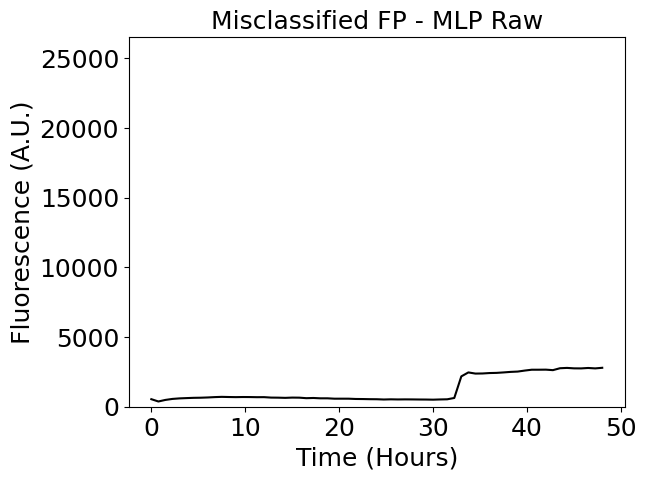

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.137729083665338, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.04897407959362549, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.794695727689245, Max: 54.12040816
MS:
	Min: 61.5, Average: 941.0824203187251, Max: 5967.75
26/26 [==============================] - 0s 680us/step


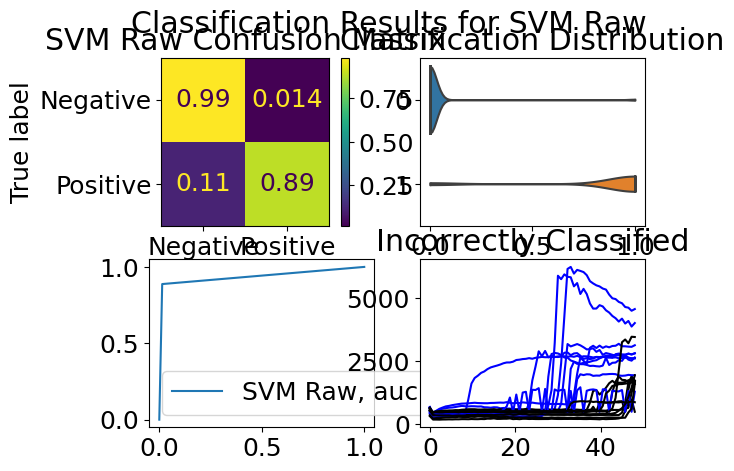

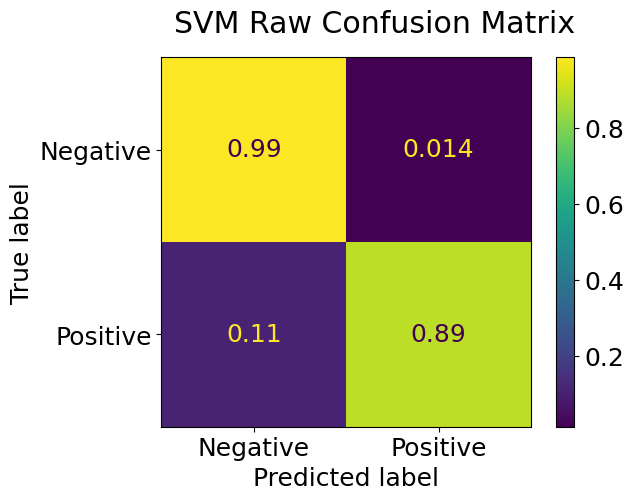

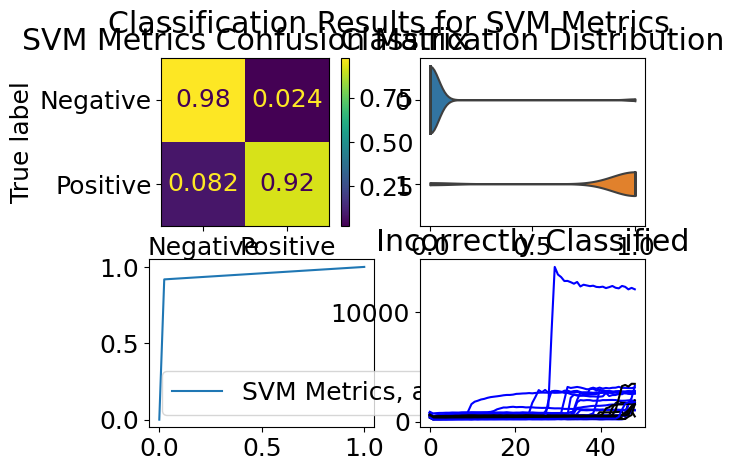

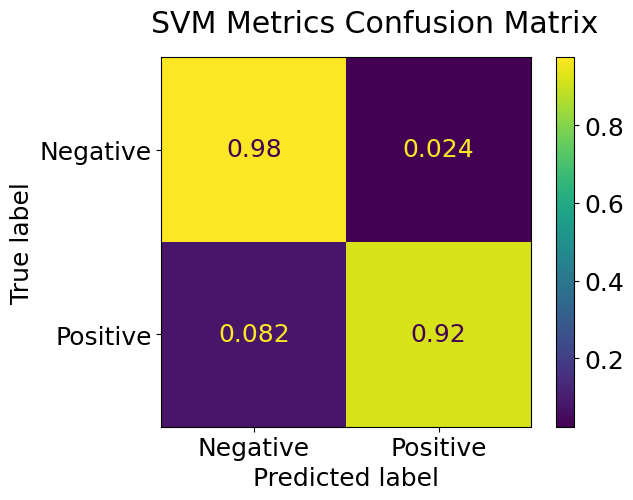

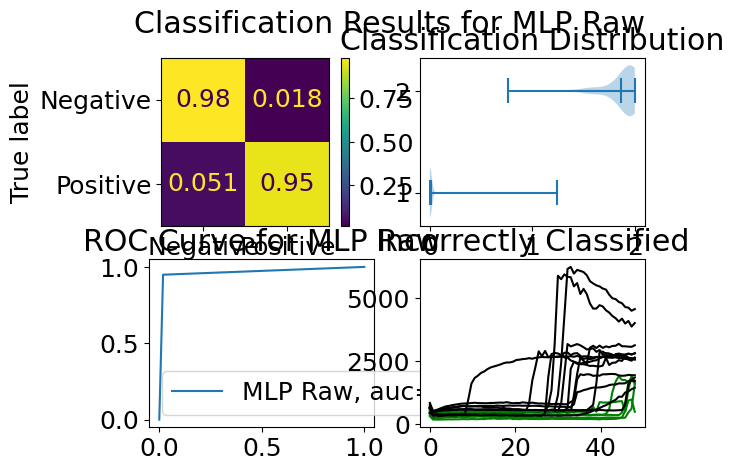

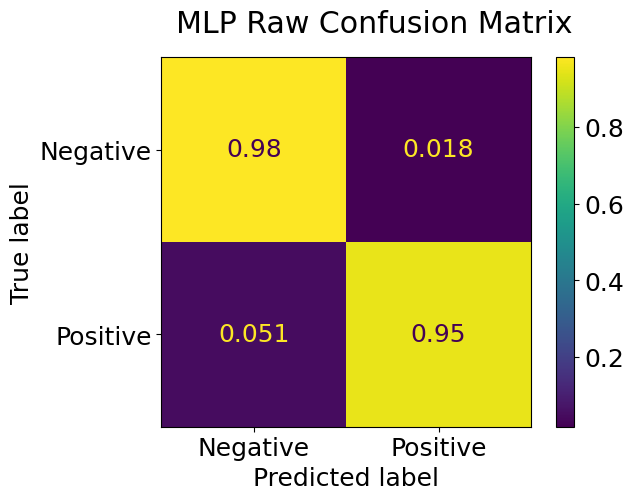

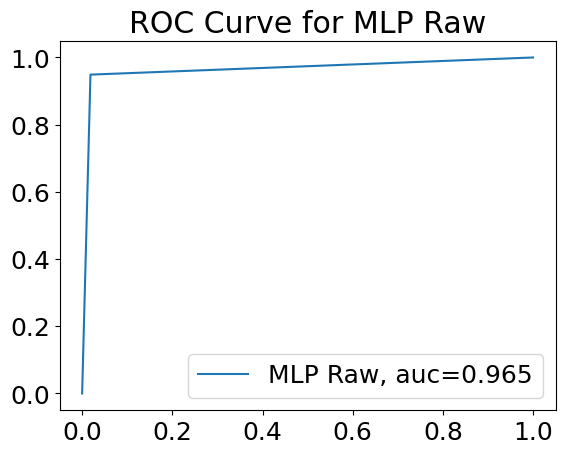

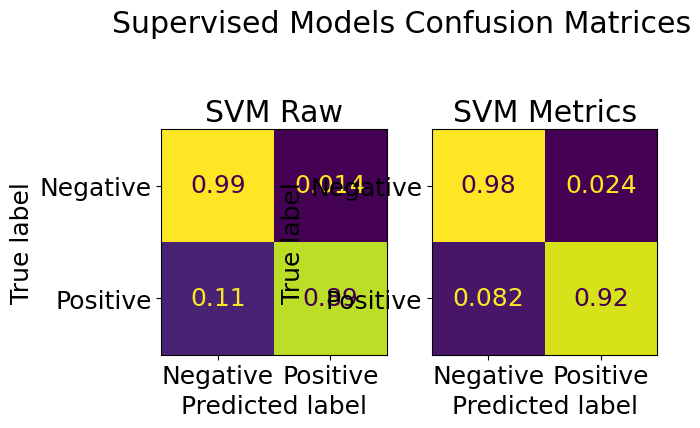

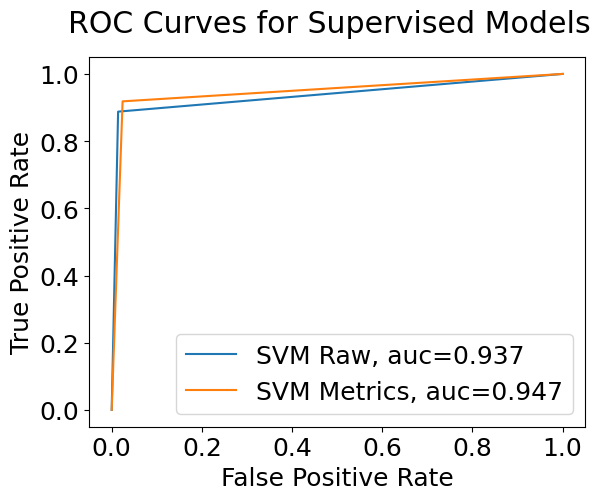

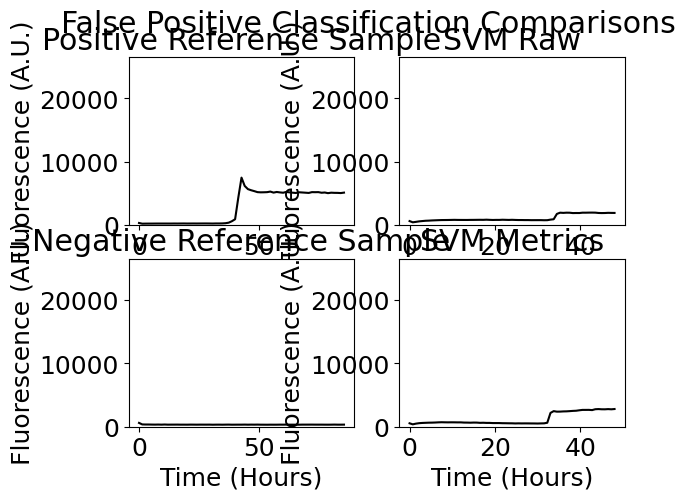

In [42]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

### G-Well Evaluation

In [43]:
#%%
### Test on G Wells
ml_quic = ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir='./Data/BigAnalysisGWells');
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3)

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised', 'Unsupervised'])

pred_km, sample_list_km = ml_quic.evaluate_replicate_performance(model='KMeans Metrics')
pred_svm_r, sample_list_svmr = ml_quic.evaluate_replicate_performance(model='SVM Raw')
pred_svm_m, sample_list_svmm = ml_quic.evaluate_replicate_performance(model='SVM Metrics')
pred_mlp, sample_list_mlp = ml_quic.evaluate_replicate_performance(model='MLP Raw')

print('Model Sample Predictions:')
print('\n{:20s} {:20s} {:20s} {:20s} {:20s}'.format('Sample:', 'KMeans Metrics:', 'SVM Raw:', 'SVM Metrics:', 'MLP Raw:'))
for i in range(len(pred_km)):
    if sample_list_km[i] != sample_list_mlp[i] or sample_list_mlp[i] != sample_list_svmm[i] or sample_list_svmm[i] != sample_list_svmr[i]:
        raise Exception('Sample order does not agree!')
    print('{:20s} {:20s} {:20s} {:20s} {:20s}'.format(sample_list_km[i], pred_km[i], pred_svm_r[i], pred_svm_m[i], pred_mlp[i]))


Loading Data from ./Data/BigAnalysisGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>
\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>
SVM Raw:
              precision    recall  f1-score   support

         neg       0.85      1.00      0.92       208
         pos       1.00      0.60      0.75        96

    accuracy                           0.88       304
   macro avg       0.92      0.80      0.83       304
weighted avg       0.89      0.88      0.86       304

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.90      1.00      0.95       208
         pos       1.00      0.77      0.87        96

    accuracy                    

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(tru

1/1 [==============================] - 0s 11ms/step
Model Sample Predictions:

Sample:              KMeans Metrics:      SVM Raw:             SVM Metrics:         MLP Raw:            
49Gx01               0/8                  0/8                  0/8                  0/8                 
14Gx01               1/8                  0/8                  0/8                  0/8                 
92Gx01               5/8                  4/8                  4/8                  4/8                 
98Gx01               4/8                  2/8                  3/8                  3/8                 
104Gx01              6/8                  2/8                  3/8                  4/8                 
121Gx01              3/8                  1/8                  2/8                  3/8                 
152Gx01              4/8                  4/8                  4/8                  4/8                 
157Gx01              4/8                  3/8                  3/8               

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Hours')

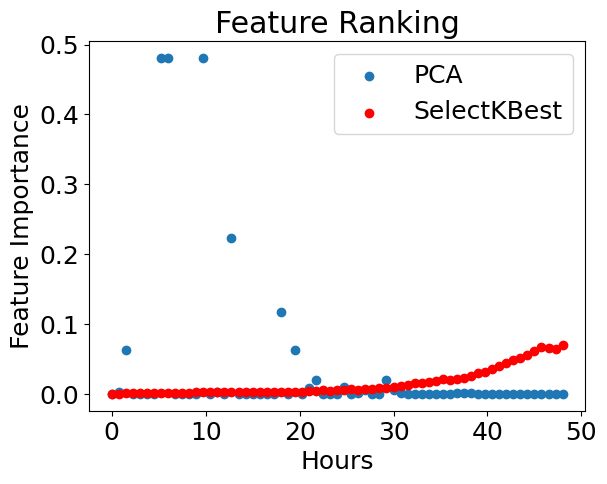

In [44]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)) * 0.75, features)
plt.scatter(np.arange(len(features)) * 0.75, skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Hours')